In [238]:
import pandas as pd
import numpy as np

In [239]:
df = pd.read_csv('phxcrime.csv', dtype={'INC NUMBER': 'str'})
df2 = df.drop(columns=['INC NUMBER','OCCURRED TO','GRID','100 BLOCK ADDR','ZIP','PREMISE TYPE'])

In [240]:
df2.rename(columns={'OCCURRED ON':'Date'}, inplace=True)
df2.rename(columns={'UCR CRIME CATEGORY':'Crime'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'],format = '%m/%d/%Y  %H:%M')
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.normalize()
df2 = df2.dropna()
df3 = df2

In [193]:
# print(df2[df2.isna().any(axis=1)])
#these are all the null rows

# df2 = df2.dropna()
# this is how we drop

#df3.set_index('Date', inplace=True)
#Set index to date

Empty DataFrame
Columns: [Date, Crime]
Index: []


In [241]:
df3 = df2.join([pd.get_dummies(df2['Crime'])])
df3 = df3.groupby('Date').sum()

In [242]:
print(df3)

            AGGRAVATED ASSAULT  ARSON  BURGLARY  DRUG OFFENSE  LARCENY-THEFT  \
Date                                                                           
2015-11-01                  14      0        23             6             78   
2015-11-02                  11      1        37             9             79   
2015-11-03                   8      1        29            13             86   
2015-11-04                   5      0        30            22             77   
2015-11-05                  10      0        30            13             65   
...                        ...    ...       ...           ...            ...   
2023-03-08                   9      0        12            26             47   
2023-03-09                  15      0        10            23             58   
2023-03-10                  11      1        12            14             61   
2023-03-11                  26      1        11            11             53   
2023-03-12                  17      2   

In [243]:
import seaborn as sns
sns.set_theme(style="whitegrid")





In [245]:
df4 = df3.rolling(7).mean()

<AxesSubplot:xlabel='Date'>

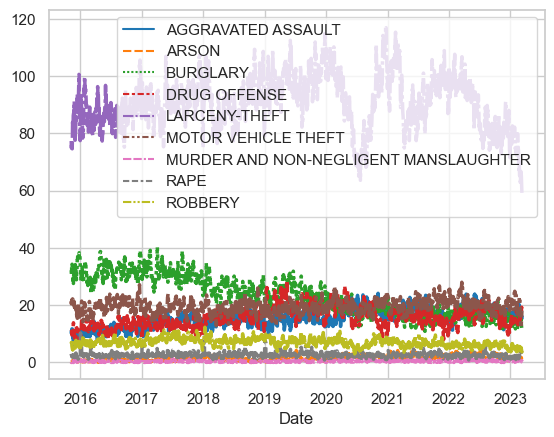

In [246]:
sns.lineplot(data=df4, palette="tab10", linewidth=2.5)

In [225]:
# df3['count'] = df3['RAPE'].groupby(df3['RAPE']).transform('count')

In [140]:
# df3['count'] = df2['Date'].groupby(df['Crime']).transform('count')

In [69]:
# df3 = df2.groupby(df2.index.date).count()

In [67]:
#df2['count'] = df2['Crime'].groupby(df2['Crime']).transform('count')
# df2 = df2.drop(columns=['count'])

In [ ]:
# df3 = df2['Crime'].value_counts()

In [95]:
# df3 = df2.groupby("Crime")['Date'].nunique()

In [108]:
# df3['freq_count'] = df2.groupby('Crime')['Date'].transform('count')